# Objective, Context and Data description

**PROJECT OBJECTIVE:** Company’s management requires an automation which can create a classifier capable of determining a flower’s species from a photo

**DOMAIN:** Botanical research

**• CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of flowers. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo

**DATA DESCRIPTION:** The dataset comprises of images from 17 plant species.

# Steps & Tasks

**Steps and tasks: [ Total Score: 25 points]**
1. Import the data. Analyse the dimensions of the data.

2. Preprocess the data.

3. Data visualisation:
• Display the images
• Display the labels
• Display images vs labels
• Apply different filters [ for example: blur, contour, edge detection, emboss, smooth etc.] on the images and display the image.

4. Train tune and test AIML image classifier model using:
• Use supervised learning algorithms for training
• Use neural networks for training
• Use CNN for training
• Use various CNN with transferred learning models for training
• Compare the results from the above step along with your detailed observations.

5. Create a GUI to import the image “Prediction.jpg” and use the above designed AIML image classification model to predict the class/label of this image.

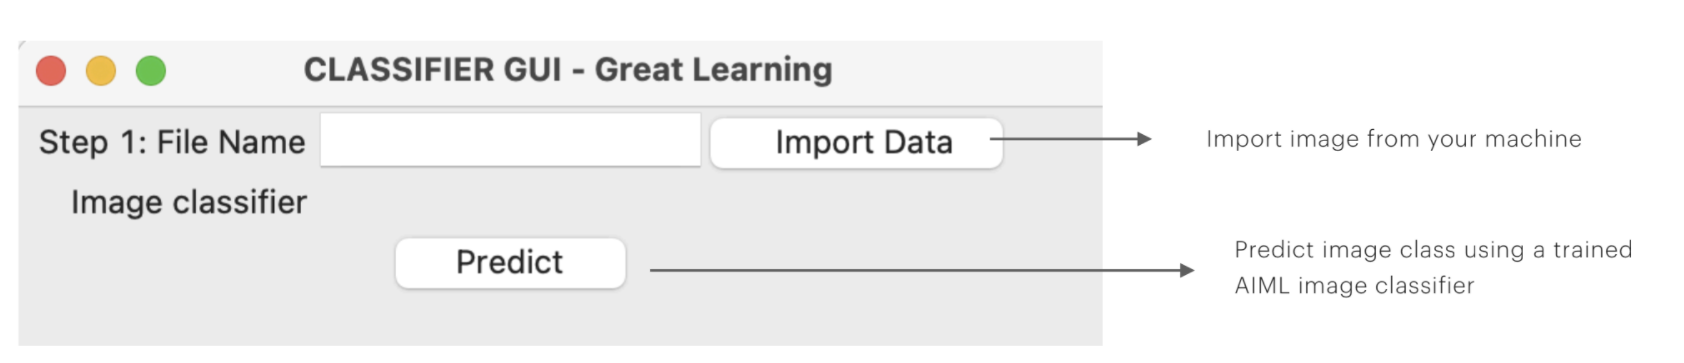

# Connecting to gdrive, extracting files

In [ ]:
from google.colab import drive
import tensorflow as tf
import numpy as np
import os
import pickle
import pandas as pd

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unrar x -Y "/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers.rar" "/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers.rar

Extracting  /content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers/17flowers.pkl       1%  2%  3%  4%  6%  7%  8%  9% 11% 12% 13% 14% 16% 17% 18% 19% 21% 22% 23% 24% 25% 27% 28% 29% 30% 32% 33% 34% 35% 37% 38% 39% 40% 42% 43% 44% 45% 46% 48% 49% 50% 51% 53% 54% 55% 56% 58% 59% 60% 61% 63% 64%  OK 
Extracting  /content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers/17flowers.tgz      64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81%  OK 
Creating    /content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers/jpg 

In [ ]:
#Check if file is downloaded
project_path = '/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers' 
train_path = '/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers/jpg'

In [ ]:
print(train_path)

/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers/jpg


In [ ]:
os.chdir(project_path)

In [ ]:
# importing Test images
import tarfile 
  
# open file 
file = tarfile.open('17flowers.tgz') 
  
# extracting file 
file.extractall('./test') 
  
file.close()

In [ ]:
test_path = '/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers/test/jpg'

In [ ]:
print(test_path)

/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers/test/jpg


In [ ]:
!ls -l "/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers/test/jpg"

total 59556
-rw------- 1 root root  20399 May 15  2006 files.txt
-rw------- 1 root root  20410 May 14  2006 files.txt~
-rw------- 1 root root  52074 May  4  2006 image_0001.jpg
-rw------- 1 root root  42230 May  4  2006 image_0002.jpg
-rw------- 1 root root  47305 May  4  2006 image_0003.jpg
-rw------- 1 root root  30888 May  4  2006 image_0004.jpg
-rw------- 1 root root  33520 May  4  2006 image_0005.jpg
-rw------- 1 root root  28427 May  4  2006 image_0006.jpg
-rw------- 1 root root  38840 May  4  2006 image_0007.jpg
-rw------- 1 root root  34031 May  4  2006 image_0008.jpg
-rw------- 1 root root  32056 May  4  2006 image_0009.jpg
-rw------- 1 root root  41286 May  4  2006 image_0010.jpg
-rw------- 1 root root  35442 May  4  2006 image_0011.jpg
-rw------- 1 root root  36551 May  4  2006 image_0012.jpg
-rw------- 1 root root  49112 May  4  2006 image_0013.jpg
-rw------- 1 root root  31451 May  4  2006 image_0014.jpg
-rw------- 1 root root  34745 May  4  2006 image_0015.jpg
-rw------- 

In [ ]:
!ls -l "/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/17flowers/jpg"

total 108
drwx------ 2 root root  4096 Feb 27 04:20 0
drwx------ 2 root root  4096 Feb 27 04:20 1
drwx------ 2 root root  4096 Feb 27 04:20 10
drwx------ 2 root root  4096 Feb 27 04:20 11
drwx------ 2 root root  4096 Feb 27 04:20 12
drwx------ 2 root root  4096 Feb 27 04:20 13
drwx------ 2 root root  4096 Feb 27 04:20 14
drwx------ 2 root root  4096 Feb 27 04:20 15
drwx------ 2 root root  4096 Feb 27 04:20 16
drwx------ 2 root root  4096 Feb 27 04:20 2
drwx------ 2 root root  4096 Jan  6 05:53 3
drwx------ 2 root root  4096 Jan  6 05:55 4
drwx------ 2 root root  4096 Jan  6 05:54 5
drwx------ 2 root root  4096 Jan  6 05:54 6
drwx------ 2 root root  4096 Jan  6 05:53 7
drwx------ 2 root root  4096 Jan  6 05:54 8
drwx------ 2 root root  4096 Jan  6 05:54 9
-rw------- 1 root root 20399 May 14  2006 files.txt
-rw------- 1 root root 20410 May 13  2006 files.txt~


# Import the data. Analyse the dimensions of the data.

# Preprocess the data.

In [ ]:
#initialize Train, Test and Labels for Image classification
trainX = []
trainy = []
testX = []
testy = []
img_size = 224
img_depth = 3

In [ ]:
# change directory to train_path
os.chdir(train_path)

In [ ]:
import cv2
import os
def load_images_from_folder(folder, mode):
    features = []
    labels = []
    os.chdir(folder)
    for i in os.listdir(folder):
      if os.path.isdir(i):
        for j in os.listdir(i):
          img = cv2.imread(os.path.join(folder + '/' + i + '/' + j))
          if img is not None:
            img = cv2.resize(img, (img_size,img_size))
            trainimage = np.array(img).flatten()
            features.append(trainimage)
            labels.append(i)
      else: 
        if (mode == 'Test'):
          img = cv2.imread(os.path.join(folder + '/' + i ))
          if img is not None:
            img = cv2.resize(img, (img_size,img_size))
            testimage = np.array(img).flatten()
            features.append(img)
            labels.append(i)
    return features, labels

In [ ]:
trainX, trainy = load_images_from_folder(train_path,'Train')
testX, testy = load_images_from_folder(test_path,'Test')

In [ ]:
trainX = np.asarray(trainX)
trainy = np.asarray(trainy).reshape(len(trainy),1) # labels are also converted to (1375,1)
testX = np.asarray(testX)
testy = np.asarray(testy).reshape(len(testy),1) # labels are also converted to (1360,1)

In [ ]:
trainX = np.asarray(trainX.reshape(len(trainX), img_size, img_size, 3)) # all of the images are converted to np array of (1375,224,224,3)

In [ ]:
trainX.shape

(1375, 224, 224, 3)

In [ ]:
trainy.shape

(1375, 1)

In [ ]:
testX.shape

(1360, 224, 224, 3)

In [ ]:
testy.shape

(1360, 1)

# Data visualisation: • Display the images • Display the labels • Display images vs labels • Apply different filters [ for example: blur, contour, edge detection, emboss, smooth etc.] on the images and display the image.




In [ ]:
# split data into training and test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(trainX, trainy, test_size = 0.2, random_state =  104)

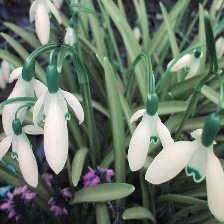

In [ ]:
#Use array_to_img function to convert numpy array to image - Visualizing Train Image
new_image = tf.keras.preprocessing.image.array_to_img(X_train[0].reshape(img_size,img_size,3))
#Show image
new_image

In [ ]:
# Label of the image
X_train[0]

array([[[ 67,  80,  95],
        [ 76,  87,  97],
        [ 69,  77,  86],
        ...,
        [214, 205, 185],
        [171, 168, 147],
        [123, 127, 105]],

       [[ 73,  84,  99],
        [ 75,  86,  96],
        [ 62,  69,  78],
        ...,
        [198, 190, 170],
        [163, 163, 142],
        [104, 110,  87]],

       [[ 59,  68,  82],
        [ 68,  77,  88],
        [ 58,  65,  74],
        ...,
        [191, 187, 166],
        [128, 130, 108],
        [119, 127, 104]],

       ...,

       [[ 16,  15,  19],
        [ 21,  20,  24],
        [ 27,  26,  30],
        ...,
        [152, 164, 142],
        [150, 162, 140],
        [133, 144, 122]],

       [[ 16,  15,  19],
        [ 24,  23,  27],
        [ 27,  26,  30],
        ...,
        [ 84, 105,  81],
        [ 95, 115,  92],
        [101, 121,  98]],

       [[ 19,  18,  22],
        [ 24,  22,  26],
        [ 23,  22,  26],
        ...,
        [ 87, 109,  85],
        [101, 123,  99],
        [111, 133, 109]]

In [ ]:
import matplotlib.pyplot as plt
def ImageOperations(op = 'Show'):
  plt.figure(figsize=(10,10)) # plot 25 images
  for i in range(10):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      img = X_train[i]/255
      if op =='blur':
        img = cv2.blur(img, (7, 7)) # filter size of 7
      elif op == 'contour':
        copyimage = img
        contours, hierarchy = cv2.findContours(copyimage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        cv2.drawContours(copyimage, contours, -1, (0, 255, 0), 3)
        img = copyimage
      plt.imshow(img, cmap=plt.cm.binary)
      plt.xlabel(y_train[i])
      cv2.waitKey(0) 
      cv2.destroyAllWindows() 

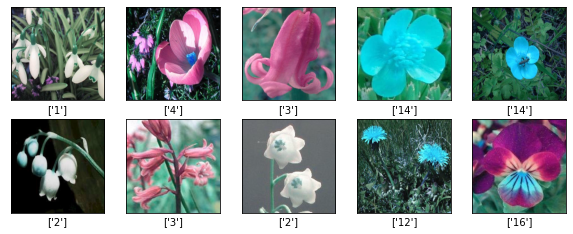

In [ ]:
ImageOperations('show')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


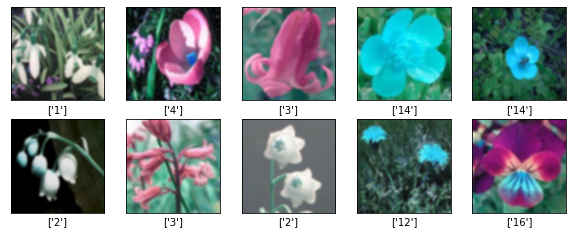

In [ ]:
# blurring image
ImageOperations('blur')

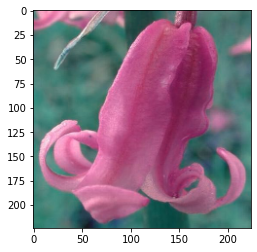

In [ ]:
# Loading the image
img = X_train[2]/255
plt.imshow(img, cmap=plt.cm.binary)

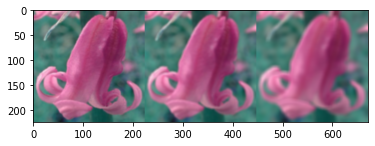

In [ ]:
# Performing averaging blurring on our  image
# Filters - left (3,3), middle(5,5), right(9,9)
blurred_1 = np.hstack([
  cv2.blur(img,(3,3)),
  cv2.blur(img,(5,5)),
  cv2.blur(img,(9,9))])  
plt.imshow(blurred_1, cmap=plt.cm.binary)

Number of Contours is: 115


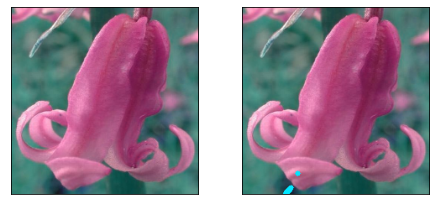

In [ ]:
# contours
img = X_train[2]
copyimg = img
import cv2
from google.colab.patches import cv2_imshow
img = np.array(copyimg, dtype=np.uint8)
# Changing the colour-space
LUV = cv2.cvtColor(copyimg, cv2.COLOR_BGR2LUV)
# Find edges
edges = cv2.Canny(LUV, 10, 100)
# Find Contours
contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Find Number of contours
print("Number of Contours is: " + str(len(contours)))
# Draw yellow border around two contours
cv2.drawContours(copyimg, contours, 0, (0, 230, 255), 6)
cv2.drawContours(copyimg, contours, 2, (0, 230, 255), 6)
# Show the image with contours
plt.figure(figsize=(20,20)) # plot all the images
plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img, cmap=plt.cm.binary)
plt.subplot(5,5,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(copyimg, cmap=plt.cm.binary)

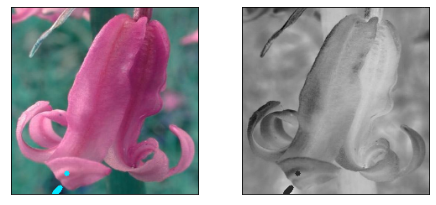

In [ ]:
# canny Edge Detection
# Loading the image
img = X_train[2]
img = np.array(img, dtype=np.uint8)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def hysteresis(img, weak, strong=255):
  M, N = img.shape
  for i in range(1, M-1):
    for j in range(1, N-1):
      if (img[i,j] == weak):
        try:
          if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong) or (img[i, j-1] == strong) or (img[i, j+1] == strong) or 
              (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
            img[i, j] = strong
          else:
            img[i, j] = 0
        except IndexError as e:
              pass
    return img
plt.figure(figsize=(20,20)) # plot all the images
plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img, cmap=plt.cm.binary)
plt.subplot(5,5,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
imgwithedges = hysteresis(gray,100,200)
plt.imshow(imgwithedges, cmap=plt.cm.binary)

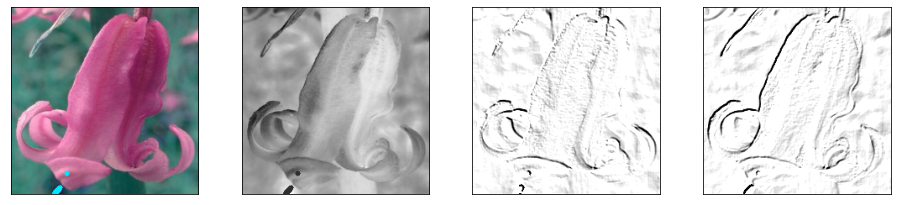

In [ ]:
# embossing Effect
img = X_train[2]
import cv2
import numpy as np

height, width = img.shape[:2]
y = np.ones((height, width), np.uint8) * 128
output = np.zeros((height, width), np.uint8)
# generating the kernels
kernel1 = np.array([[0, -1, -1], # kernel for embossing bottom left side
                    [1, 0, -1],
                    [1, 1, 0]])
kernel2 = np.array([[-1, -1, 0], # kernel for embossing bottom right side
                    [-1, 0, 1],
                    [0, 1, 1]])
# you can generate kernels for embossing top as well
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output1 = cv2.add(cv2.filter2D(gray, -1, kernel1), y) # emboss on bottom left side
output2 = cv2.add(cv2.filter2D(gray, -1, kernel2), y) # emboss on bottom right side
for i in range(height):
    for j in range(width):
        output[i, j] = max(output1[i, j], output2[i, j]) # combining both embosses to produce stronger emboss

plt.figure(figsize=(20,20)) # plot all the images
plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img, cmap=plt.cm.binary)
plt.subplot(5,5,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(gray, cmap=plt.cm.binary)
plt.subplot(5,5,3)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(output1, cmap=plt.cm.binary)
plt.subplot(5,5,4)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(output2, cmap=plt.cm.binary)

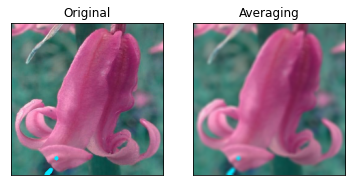

In [ ]:
# smoothing the image
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Supervised Learning Models

In [ ]:
X_train = X_train.reshape(len(X_train), (img_size*img_size*3))
X_test = X_test.reshape(len(X_test), (img_size*img_size*3))

In [ ]:
X_train.shape 

(1100, 150528)

In [ ]:
X_test.shape

(275, 150528)

In [ ]:
y_train.shape

(1100, 1)

In [ ]:
y_test.shape

(275, 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
def SavemodeltoPickle(model, modelname):
  os.chdir('/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/Models')
  outputfile = modelname + ".pkl"
  pick_model = open(outputfile, "wb")
  pickle.dump(model,pick_model)
  pick_model.close()

In [ ]:
SavemodeltoPickle(model,'KNeighbours')

In [ ]:
def LoadmodelfromPickle(modelname):
  os.chdir('/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/Models')
  inputfile = modelname + ".pkl"
  pick_model = open(inputfile, 'rb')
  model = pickle.load(pick_model)
  pick_model.close()
  return model

In [ ]:
model = LoadmodelfromPickle('KNeighbours')

In [ ]:
y_pred = model.predict(X_test)
trainacc = model.score(X_train,y_train)
testacc = model.score(X_test,y_test)
print("Train Accuracy :", trainacc)
print("Test Accuracy: ", testacc)

Train Accuracy : 0.5363636363636364
Test Accuracy:  0.3090909090909091


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
SavemodeltoPickle(rf_model,'RandomForest')

In [ ]:
model = LoadmodelfromPickle('RandomForest')

In [ ]:
y_pred = model.predict(X_test)
trainacc = model.score(X_train,y_train)
testacc = model.score(X_test,y_test)
print("Train Accuracy :", trainacc)
print("Test Accuracy: ", testacc)

Train Accuracy : 1.0
Test Accuracy:  0.4690909090909091


Prediction label 0
Actual Label 0


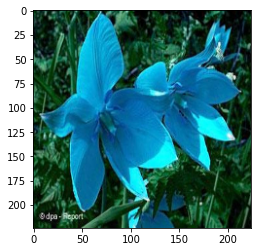

In [ ]:
img_num = np.random.randint(0,X_test.shape[0])
input_data = np.expand_dims(X_test[img_num], axis=0)
pred = model.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
print('Actual Label', np.argmax(y_test[img_num]))
plt.imshow(X_test[img_num].reshape(img_size,img_size,3))
plt.show()

In [ ]:
testX.shape

(1360, 224, 224, 3)

Prediction label 0


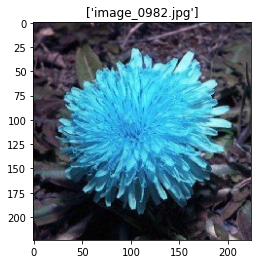

In [ ]:
X_true = testX.reshape(testX.shape[0],(img_size*img_size*img_depth))
img_num = np.random.randint(0,X_true.shape[0])
input_data = np.expand_dims(X_true[img_num], axis=0)
pred = model.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
plt.title(testy[img_num])
plt.imshow(X_true[img_num].reshape(img_size,img_size,img_depth))
plt.show()

# Deep Learning Model - Neural Networks

In [ ]:
'''# Label Encoding the Classes for Deep Neural Networks
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categories = le.fit_transform(trainy)'''

In [ ]:
trainX.shape

(1375, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(trainX,trainy, test_size = 0.2)

In [ ]:
X_train2 = X_train2.reshape(len(X_train2), (img_size*img_size*3))
X_test2 = X_test2.reshape(len(X_test2), (img_size*img_size*3))

In [ ]:
import tensorflow as tf
y_train2 = tf.keras.utils.to_categorical(y_train2, num_classes=17)
y_test2 = tf.keras.utils.to_categorical(y_test2, num_classes=17)

In [ ]:
X_train2.shape

(1100, 150528)

In [ ]:
X_test2.shape

(275, 150528)

In [ ]:
y_train2.shape

(1100, 17)

In [ ]:
y_test2.shape

(275, 17)

In [ ]:
from keras.layers import Dense, Activation
#Initialize Sequential model
tf.keras.backend.clear_session()

model2 = tf.keras.models.Sequential()

#Reshape data from 3D to 1D -> 224X224X3 to 150528
model2.add(tf.keras.layers.Reshape((150528,),input_shape=(img_size,img_size,3,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [ ]:
# 1st Hidden layer
model2.add(tf.keras.layers.Dense(360, activation='relu'))
# 2nd Hidden layer
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(180, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.25))
# 3rd Hidden layer
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))

In [ ]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(17, activation='softmax'))

In [ ]:
#Compile the model
model2.compile( optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# saving the best model using checkpoint in a file
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('flowers_NN.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 150528)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150528)            602112    
_________________________________________________________________
dense (Dense)                (None, 360)               54190440  
_________________________________________________________________
batch_normalization_1 (Batch (None, 360)               1440      
_________________________________________________________________
dense_1 (Dense)              (None, 180)               64980     
_________________________________________________________________
dropout (Dropout)            (None, 180)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 180)               7

In [ ]:
model2.fit(X_train2,y_train2,          
          epochs=10,
          validation_data = (X_test2, y_test2),
          batch_size=32, 
          callbacks=[model_checkpoint])

Epoch 1/10
35/35 [==============================] - 21s 557ms/step - loss: 3.0667 - accuracy: 0.1160 - val_loss: 9.2839 - val_accuracy: 0.1855

Epoch 00001: val_accuracy improved from -inf to 0.18545, saving model to flowers_NN.h5
Epoch 2/10
35/35 [==============================] - 21s 593ms/step - loss: 2.5071 - accuracy: 0.2239 - val_loss: 3.5438 - val_accuracy: 0.2036

Epoch 00002: val_accuracy improved from 0.18545 to 0.20364, saving model to flowers_NN.h5
Epoch 3/10
35/35 [==============================] - 21s 593ms/step - loss: 2.0777 - accuracy: 0.3142 - val_loss: 2.3330 - val_accuracy: 0.3273

Epoch 00003: val_accuracy improved from 0.20364 to 0.32727, saving model to flowers_NN.h5
Epoch 4/10
35/35 [==============================] - 21s 591ms/step - loss: 1.8340 - accuracy: 0.4114 - val_loss: 2.0889 - val_accuracy: 0.3273

Epoch 00004: val_accuracy did not improve from 0.32727
Epoch 5/10
35/35 [==============================] - 19s 542ms/step - loss: 1.6720 - accuracy: 0.4574 -

In [ ]:
model2.fit(X_train2,y_train2,          
          epochs=50,
          validation_data = (X_test2, y_test2),
          initial_epoch = 10,
          batch_size=32, 
          callbacks=[model_checkpoint])

Epoch 11/50
35/35 [==============================] - 19s 545ms/step - loss: 0.5289 - accuracy: 0.8482 - val_loss: 1.6696 - val_accuracy: 0.4982

Epoch 00011: val_accuracy improved from 0.46182 to 0.49818, saving model to flowers_NN.h5
Epoch 12/50
35/35 [==============================] - 21s 588ms/step - loss: 0.4555 - accuracy: 0.8773 - val_loss: 1.7538 - val_accuracy: 0.4582

Epoch 00012: val_accuracy did not improve from 0.49818
Epoch 13/50
35/35 [==============================] - 19s 542ms/step - loss: 0.3977 - accuracy: 0.8818 - val_loss: 1.7042 - val_accuracy: 0.5309

Epoch 00013: val_accuracy improved from 0.49818 to 0.53091, saving model to flowers_NN.h5
Epoch 14/50
35/35 [==============================] - 21s 589ms/step - loss: 0.3861 - accuracy: 0.8855 - val_loss: 1.7789 - val_accuracy: 0.4909

Epoch 00014: val_accuracy did not improve from 0.53091
Epoch 15/50
35/35 [==============================] - 19s 543ms/step - loss: 0.3134 - accuracy: 0.9118 - val_loss: 1.7920 - val_acc

Prediction label 0
Actual Label 14


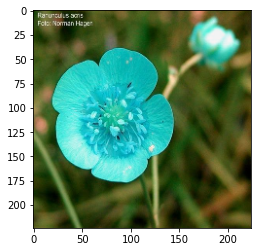

In [ ]:
img_num = np.random.randint(0,X_test2.shape[0])
input_data = np.expand_dims(X_test2[img_num], axis=0)
pred = model2.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
print('Actual Label', np.argmax(y_test2[img_num]))
plt.imshow(X_test2[img_num].reshape(img_size,img_size,3))
plt.show()

In [ ]:
import keras.models
from keras.models import load_model
os.chdir('/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/Models')
model = keras.models.load_model('flowers_NN.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 150528)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150528)            602112    
_________________________________________________________________
dense (Dense)                (None, 360)               54190440  
_________________________________________________________________
batch_normalization_1 (Batch (None, 360)               1440      
_________________________________________________________________
dense_1 (Dense)              (None, 180)               64980     
_________________________________________________________________
dropout (Dropout)            (None, 180)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 180)               7

Prediction label 3


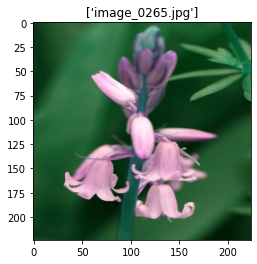

In [ ]:
X_true = testX.reshape(testX.shape[0],(img_size*img_size*img_depth))
img_num = np.random.randint(0,X_true.shape[0])
input_data = np.expand_dims(X_true[img_num], axis=0)
pred = model.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
plt.title(testy[img_num])
plt.imshow(X_true[img_num].reshape(img_size,img_size,img_depth))
plt.show()

# CNN Model

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# using Image Generator with scaling, image aumentation features
image_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [ ]:
trainX.shape

(1375, 224, 224, 3)

In [ ]:
image_datagenerator.fit(trainX)

In [ ]:
trainy = tf.keras.utils.to_categorical(trainy, num_classes=17)
trainy.shape

(1375, 17)

In [ ]:
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3 = train_test_split(trainX,trainy, test_size = 0.2)

In [ ]:
X_train3.shape

(1100, 224, 224, 3)

In [ ]:
y_train3.shape

(1100, 17)

In [ ]:
X_test3.shape

(275, 224, 224, 3)

In [ ]:
y_test3.shape

(275, 17)

In [ ]:
# CNN Model

#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model3 = tf.keras.models.Sequential()

#normalize data
model3.add(tf.keras.layers.InputLayer(input_shape=(img_size,img_size,img_depth,)))
model3.add(tf.keras.layers.BatchNormalization())

#Add 1st Conv Layer
model3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#BatchNormalization Layer
model3.add(tf.keras.layers.BatchNormalization())

#Add 2nd Conv Layer
model3.add(tf.keras.layers.Conv2D(64, kernel_size=(4,4), activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#Add 3rd Conv Layer
model3.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
#Add Max Pool layer
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#Add 4th Conv Layer
model3.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
#Add Max Pool layer
model3.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

#BatchNormalization Layer
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layers after flattening the data
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dense(64, activation='relu'))

#Add Dropout
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Dense(32, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))

#Add Output Layer
model3.add(tf.keras.layers.Dense(17, activation='softmax'))

In [ ]:
#Specify Loass and Optimizer
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Model Summary
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 64)      32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 128)       7

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('flowers_CNN.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)

In [ ]:
model3.fit(X_train3,y_train3,
          epochs=50,
          steps_per_epoch= 1100//32,  #Number of batches per epoch
          validation_data=(X_test3, y_test3),
          validation_steps = 275//32, #Number of validation images//batch_size
          callbacks=[model_checkpoint], 
          verbose = 1) 

Epoch 1/50
34/34 [==============================] - 170s 5s/step - loss: 3.2848 - accuracy: 0.1007 - val_loss: 5.3319 - val_accuracy: 0.0836

Epoch 00001: val_accuracy improved from -inf to 0.08364, saving model to flowers_CNN.h5
Epoch 2/50
34/34 [==============================] - 168s 5s/step - loss: 2.7159 - accuracy: 0.1667 - val_loss: 2.5514 - val_accuracy: 0.2036

Epoch 00002: val_accuracy improved from 0.08364 to 0.20364, saving model to flowers_CNN.h5
Epoch 3/50
34/34 [==============================] - 175s 5s/step - loss: 2.5562 - accuracy: 0.2001 - val_loss: 2.5102 - val_accuracy: 0.2182

Epoch 00003: val_accuracy improved from 0.20364 to 0.21818, saving model to flowers_CNN.h5
Epoch 4/50
34/34 [==============================] - 168s 5s/step - loss: 2.3316 - accuracy: 0.2567 - val_loss: 2.3675 - val_accuracy: 0.2836

Epoch 00004: val_accuracy improved from 0.21818 to 0.28364, saving model to flowers_CNN.h5
Epoch 5/50
34/34 [==============================] - 168s 5s/step - loss

Prediction label 3
Actual Label 3


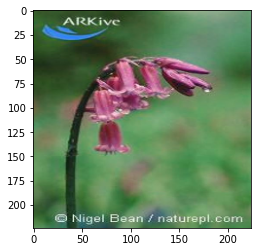

In [ ]:
img_num = np.random.randint(0,X_test3.shape[0])
input_data = np.expand_dims(X_test3[img_num], axis=0)
pred = model3.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
print('Actual Label', np.argmax(y_test3[img_num]))
plt.imshow(X_test3[img_num].reshape(img_size,img_size,3))
plt.show()

In [ ]:
import keras.models
from keras.models import load_model
os.chdir('/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/Models')
model = keras.models.load_model('flowers_CNN.h5')

Prediction label 4


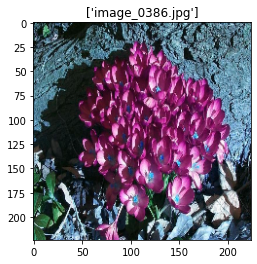

In [ ]:
# Image prediction using CNN Model
img_num = np.random.randint(0,testX.shape[0])
input_data = np.expand_dims(testX[img_num], axis=0)
pred = model.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
plt.title(testy[img_num])
plt.imshow(testX[img_num].reshape(img_size,img_size,3))
plt.show()

# CNN Model - Transfer Learning

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def normalize_data(img):
    #Normalize for ResNet50
    return tf.keras.applications.resnet50.preprocess_input(img)

In [ ]:
#Define Training Data Generator with augmentations
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                validation_split = 0.2,
                                                                preprocessing_function=normalize_data) #Normalize the data accordingly

#Define Test Data Generator with NO augmentations
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=normalize_data) #Normalize the data accordingly

In [ ]:
#Training (from directory)
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    class_mode ='categorical', 
                                                    target_size=(img_size, img_size), #Image resize dimensions
                                                    subset = 'training',
                                                    batch_size=32)

Found 1101 images belonging to 17 classes.


In [ ]:
#Test (from directory)
validation_generator = train_datagen.flow_from_directory(train_path, 
                                                  class_mode ='categorical', 
                                                  target_size=(img_size, img_size), #Image resize dimensions
                                                  subset = 'validation',
                                                  batch_size=32)

Found 274 images belonging to 17 classes.


In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.applications.ResNet50(include_top=False, #Do not include classification layer for imagenet
                                       input_shape=(img_size,img_size,3),
                                       weights='imagenet')

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
#Set pre-trained model layers to not trainable
for layer in model.layers:
    layer.trainable = False

In [ ]:
#Check if layers frozen
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
#get Output layer of Pre0trained model
x1 = model.output

#Global average pool to reduce number of features and Flatten the output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)

In [ ]:
#Output shape of Global Average Pooling
x2

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
#Add output layer
prediction = tf.keras.layers.Dense(17,activation='softmax')(x2)

In [ ]:
prediction

<KerasTensor: shape=(None, 17) dtype=float32 (created by layer 'dense')>

In [ ]:
#Using Keras Model class
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=prediction) #Output layer added

In [ ]:
#Compile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('17flowers_resnet.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
final_model.fit(train_generator,
                epochs=5,
                steps_per_epoch= 1101//32,
                validation_data=validation_generator,
                validation_steps = 274//32, 
                callbacks=[model_checkpoint])

Epoch 1/5
34/34 [==============================] - 237s 7s/step - loss: 2.5641 - accuracy: 0.2744 - val_loss: 0.8332 - val_accuracy: 0.8008

Epoch 00001: val_accuracy improved from -inf to 0.80078, saving model to 17flowers_resnet.h5
Epoch 2/5
34/34 [==============================] - 220s 6s/step - loss: 0.7296 - accuracy: 0.8494 - val_loss: 0.5550 - val_accuracy: 0.8555

Epoch 00002: val_accuracy improved from 0.80078 to 0.85547, saving model to 17flowers_resnet.h5
Epoch 3/5
34/34 [==============================] - 220s 6s/step - loss: 0.3867 - accuracy: 0.9289 - val_loss: 0.4709 - val_accuracy: 0.8398

Epoch 00003: val_accuracy did not improve from 0.85547
Epoch 4/5
34/34 [==============================] - 222s 7s/step - loss: 0.2906 - accuracy: 0.9468 - val_loss: 0.4319 - val_accuracy: 0.8672

Epoch 00004: val_accuracy improved from 0.85547 to 0.86719, saving model to 17flowers_resnet.h5
Epoch 5/5
34/34 [==============================] - 221s 7s/step - loss: 0.2408 - accuracy: 0.950

In [ ]:
#Unfreezing all layers after layer#
for layer in model.layers[170:]:
    layer.trainable = True 

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#We will need to recompile the model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
#Lets train for 10 steps
final_model.fit(train_generator, 
                epochs=15,
                initial_epoch=5,
                steps_per_epoch= 1101//32,
                validation_data=validation_generator,
                validation_steps = 274//32, 
                callbacks=[model_checkpoint])

Epoch 6/15
34/34 [==============================] - 234s 7s/step - loss: 0.2587 - accuracy: 0.9224 - val_loss: 0.3514 - val_accuracy: 0.8750

Epoch 00006: val_accuracy did not improve from 0.87500
Epoch 7/15
34/34 [==============================] - 229s 7s/step - loss: 0.1216 - accuracy: 0.9629 - val_loss: 0.4321 - val_accuracy: 0.8555

Epoch 00007: val_accuracy did not improve from 0.87500
Epoch 8/15
34/34 [==============================] - 227s 7s/step - loss: 0.0566 - accuracy: 0.9900 - val_loss: 0.2939 - val_accuracy: 0.9180

Epoch 00008: val_accuracy improved from 0.87500 to 0.91797, saving model to 17flowers_resnet.h5
Epoch 9/15
34/34 [==============================] - 238s 7s/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.2516 - val_accuracy: 0.9180

Epoch 00009: val_accuracy did not improve from 0.91797
Epoch 10/15
34/34 [==============================] - 227s 7s/step - loss: 0.0431 - accuracy: 0.9891 - val_loss: 0.2037 - val_accuracy: 0.9297

Epoch 00010: val_accuracy im

In [ ]:
final_model.save('17flowers_resnet.h5')

In [ ]:
import keras.models
from keras.models import load_model
os.chdir('/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/Models')
model = keras.models.load_model('17flowers_resnet.h5')

Prediction label 1


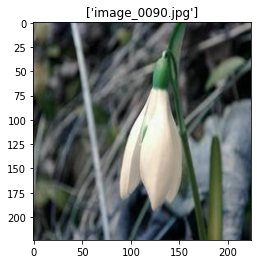

In [ ]:
# Image prediction using CNN Model
img_num = np.random.randint(0,testX.shape[0])
input_data = np.expand_dims(testX[img_num], axis=0)
pred = model.predict(input_data)
print('Prediction label', np.argmax(pred[0]))
plt.title(testy[img_num])
plt.imshow(testX[img_num].reshape(img_size,img_size,3))
plt.show()

In [ ]:
#KNN
#Train Accuracy : 0.5363636363636364
#Test Accuracy:  0.3090909090909091

#RandomForest

#Train Accuracy : 1.0
#Test Accuracy:  0.4690909090909091

#recordmodelmetrics('Neural Networks',88.18,53.09)
#recordmodelmetrics('CNN Model', 93.87, 67.64)
#recordmodelmetrics('CNN Model(Resnet) - Transfer Learning', 98.91, 92.97)
# saving the metrics to the CSV file to use it on the GUI
os.chdir(project_path)
import pandas as pd
model_df = pd.DataFrame(columns = ['Model','Train Accuracy', 'Test Accuracy'])
model_df['Model'] = ['KNN','RandomForest','Neural Networks','CNN','CNN-Resnet']
model_df['Train Accuracy'] = [53.63,100,88.18,93.87,98.91]
model_df['Test Accuracy'] = [30.91,46.91,53.09,67.64,92.97]

model_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Project-CNN-2/modelmetrics.csv')

# Analysis and Inference

The Images of different dimensions are resized to 224 X 224 to perform analysis,

1375 images are available in train folder and 1360 images in the test folder

**Pre-processing:** Data augmentation of Visual image is displayed with smoothing, blurring and edge detection, this will help identify more neighbourhood information eventually better prediction of imagess

Train-Validation split is done for model building

1375 Images are further split into 1100 and 275 for validation

Supervised learning models - Randomforest classifier provides a test accuracy of 49% without any hyperparameter tuning

Neural networks - Deep neural networks provided an accuracy of 53% (Epoch 00050: val_accuracy did not improve from 0.53091)

Model Summary : Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

reshape (Reshape)            (None, 150528)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150528)            602112    
_________________________________________________________________
dense (Dense)                (None, 360)               54190440  
_________________________________________________________________
batch_normalization_1 (Batch (None, 360)               1440      
_________________________________________________________________
dense_1 (Dense)              (None, 180)               64980     
_________________________________________________________________
dropout (Dropout)            (None, 180)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 180)               720       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                11584     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 17)                1105      

Total params: 54,872,381
Trainable params: 54,570,245
Non-trainable params: 302,136


Regular CNN model is built with the following layers

Layer (type)                 Output Shape              Param #   

batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 108, 64)      32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 128)       512       
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2769024   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 17)                561       

Total params: 3,035,741
Trainable params: 3,035,415
Non-trainable params: 326

CNN model provided an test accuracy of 67% (Epoch 00050: val_accuracy did not improve from 0.67636)

Now with the Transfer learning CNN model of Resnet is tried with the following layers, which provided the highest accuracy of 92% with 15 iterations(Epoch 00015: val_accuracy did not improve from 0.92969)

GUI is prepared with the models saved


